In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
df1=pd.read_csv("/Users/apple/Desktop/Data science/py-master/ML/9_decision_tree/Exercise/titanic.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
df1=df1.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [153]:
df1.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
le=LabelEncoder()

In [156]:
df1['sex_n']=le.fit_transform(df1['Sex'])

In [157]:
df1.head(5)

,Survived,Pclass,Sex,Age,Fare,sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [158]:
df1=df1.drop(['Sex'],axis='columns')
df1.head(5)

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x=df1.drop(['Survived'],axis='columns').interpolate(method='pad')
y=df1['Survived'].interpolate(method='pad')

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [171]:
from sklearn import tree

In [172]:
model=tree.DecisionTreeClassifier()

In [173]:
x_train=x_train.fillna({
    'Pclass':2.2921,
    'Age':29.733,
    'Fare':32.186,
    'sex_n':1
})
x_test.describe()
x_test=x_test.fillna({
    'Pclass':2.2921,
    'Age':29.733,
    'Fare':32.186,
    'sex_n':1
})

In [174]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [175]:
print(model.score(x_test,y_test))
y_pre=model.predict(x_test)

0.8100558659217877


In [176]:
from sklearn.metrics import confusion_matrix

In [177]:
cnf=confusion_matrix(y_pre,y_test)

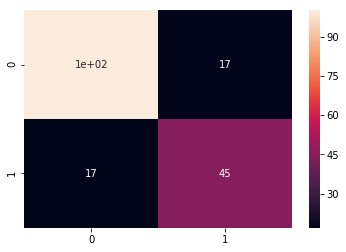

In [178]:
sns.heatmap(cnf,annot=True)